# Data Cleaning

Lets import all the required libraries and get started.

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# The master dataframe
car_df = pd.read_csv('./CarPrice_Assignment.csv',sep=',' ,dtype='unicode')
car_df.head(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9,111,5000,21,27,16500
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9,154,5000,19,26,16500
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10,102,5500,24,30,13950
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8,115,5500,18,22,17450
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,18920
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.4,7,160,5500,16,22,17859.167


### Null value treatment
Lets find out if there are columns with significant percentage of null values.

In [2]:
round(100*(car_df.isnull().sum()/len(car_df.index)), 2)

car_ID              0.0
symboling           0.0
CarName             0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
dtype: float64

Since none of the columns have any null values, there is no requirement for null treatment. We can move on to the next step.


### Process columns

- As per the instructions of the assignment, we only require the company name portion of the CarName variable. We will hence drop the model names of the cars.

In [3]:
# method to extract the company name from the car name
def removeModelName(name):
    return name.split()[0]

car_df['CarName'] = car_df['CarName'].apply(lambda name: removeModelName(name))

# Print all the car names to see if everything looks good
car_df['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

From the output above, its quite clear that some car brands are named differently although they are the same company. For example - 'maxda' and 'mazda', 'Nissan' and 'nissan', 'porsche' and 'porcshce', etc.

In [4]:
# method to fix alternate spellings of the same car
def fixCarName(name):
    if name == 'maxda':
        return 'mazda'
    elif name == 'Nissan':
        return 'nissan'
    elif name == 'porcshce':
        return 'porsche'
    elif name == 'toyouta':
        return 'toyota'
    elif (name == 'vokswagen') or (name == 'vw'):
        return 'volkswagen'
    return name

car_df['CarName'] = car_df['CarName'].apply(lambda name: fixCarName(name))
car_df['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

- The continuous variables need to be converted to float for further analysis. Raw read from CSV converts them to Object.

In [5]:
# method to fix data types of continuous variables
def fixDataTypes(df):
    df['wheelbase'] = df['wheelbase'].astype(float)
    df['carlength'] = df['carlength'].astype(float)
    df['carwidth'] = df['carwidth'].astype(float)
    df['carheight'] = df['carheight'].astype(float)
    df['curbweight'] = df['curbweight'].astype(int)
    df['enginesize'] = df['enginesize'].astype(int)
    df['boreratio'] = df['boreratio'].astype(float)
    df['stroke'] = df['stroke'].astype(float)
    df['compressionratio'] = df['compressionratio'].astype(float)
    df['horsepower'] = df['horsepower'].astype(int)
    df['peakrpm'] = df['peakrpm'].astype(int)
    df['citympg'] = df['citympg'].astype(int)
    df['highwaympg'] = df['highwaympg'].astype(int)
    df['price'] = df['price'].astype(float)

fixDataTypes(car_df)
car_df.dtypes

car_ID               object
symboling            object
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

- Outlier treatment is not necessary for this ananlysis.

For now, we are satisfied with the data cleaning. Later, on demand, we may resort to more data cleaning procedures.

# Bivariate Analysis 

We want to start our analysis by checking how each variable independently affects the prices of the cars in US.

## Analysis of Continuous Variables

Lets start with bivariate analysis of continuous variables.

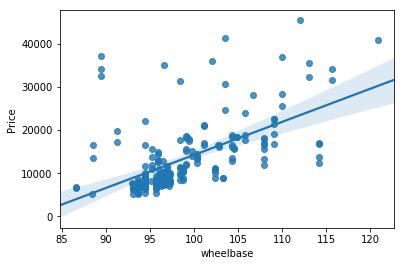

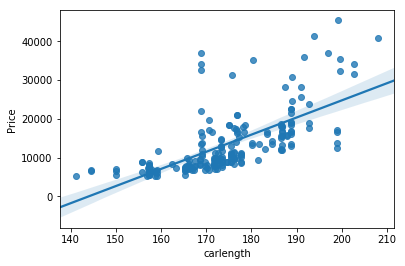

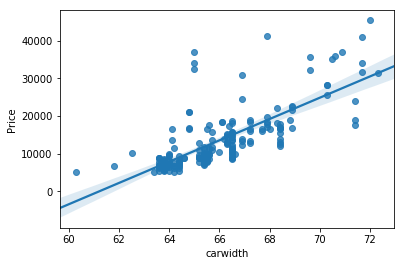

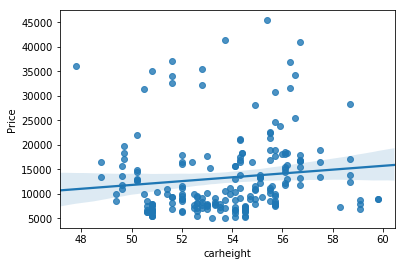

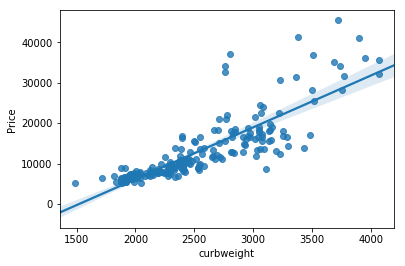

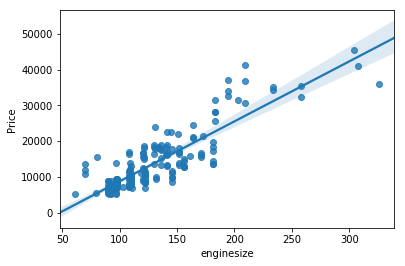

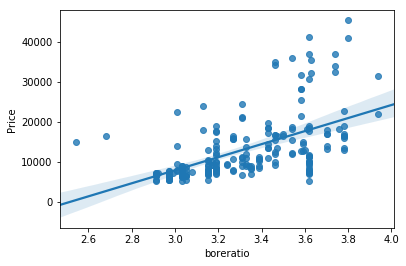

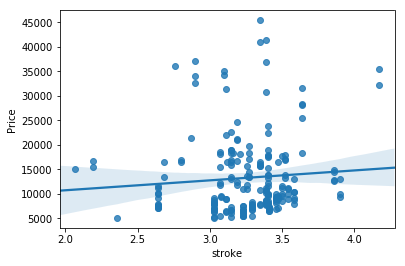

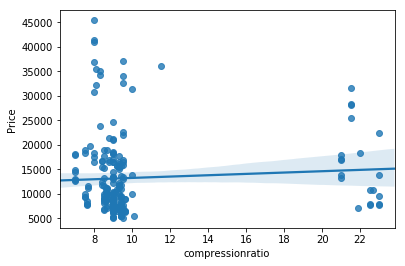

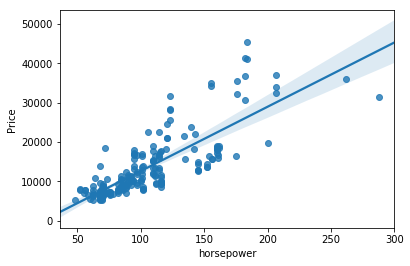

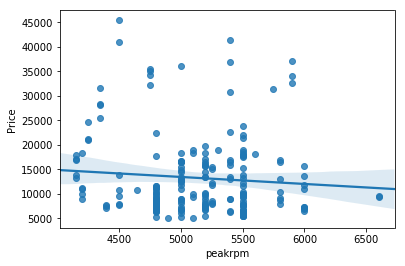

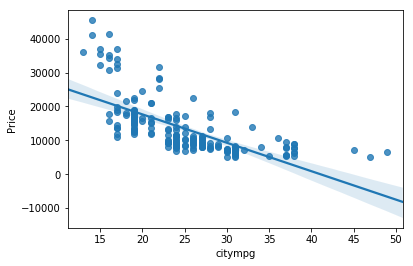

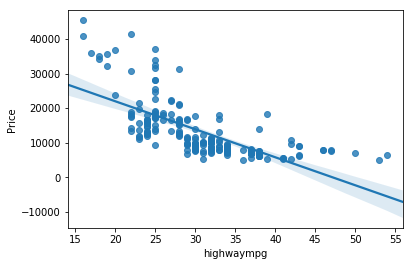

In [6]:
# creates regplot between the Price and a given continuous variable
def plotContVarAgainstPrice(var):
    plt.figure(figsize=(6, 4))
    ax = sns.regplot(x=var, y='price',data=car_df)
    ax.set(xlabel = var, ylabel = 'Price')
    plt.show()

# list of all continuous variabls    
continuous_vars = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']

# plot all the continuous variables against price of the cars
for var in continuous_vars:
    plotContVarAgainstPrice(var)

If we analyze the plots shown above carefully, we can find that a few variables don't have poor correlation with the price of the car. In other words, a change in these parameters are unlikely to have any significant impact on the price of the cars in US. So, we are going to drop - carheight, compressionratio, and peakrpm.

Also, if we check the citympg and highwaympg, we will find that they are highly correlated. Since they essentially provides the same information we will just keep one of them for the analysis. Hence we will drop highwaympg.

In [7]:
# list of columns to be dropped
cols_to_be_dropped = ['carheight','compressionratio','peakrpm', 'highwaympg']
# update the dataframe
car_df = car_df.drop(cols_to_be_dropped,axis=1)
print(car_df.columns)

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'horsepower',
       'citympg', 'price'],
      dtype='object')


## Derived variables

Besides the attributes available in the dataframe, we are also interested to know if there can be any derived variables which might impact the price of the cars in US. For this analysis, I will define the following derived variable:
- curbhp (curbweight per horsepower):
Its easy to understand that curbweight(the weight of a car without occupants or baggage) can impact the horsepower of a car. Any ratio will help Geely understand how much power they need to pack in a car of a given weight to achieve a certain price point.

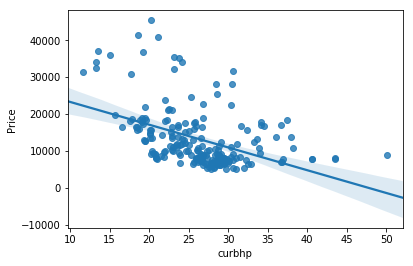

In [8]:
car_df['curbhp'] = car_df['curbweight']/car_df['horsepower']
plotContVarAgainstPrice('curbhp')

The plot is quite interesting. It says that despite horsepower and curbweight having positive correlations their ratio has a negative correlation. Geely needs to take this into account and keep a balance between the curbweight and horsepower.

- stroke_bore (stroke by boreratio): This is an important attribute that is often of interest to car manufacturers. This ratio indicates the efficiency of combustion of the engine. It could have an impact on the price of a car in US.

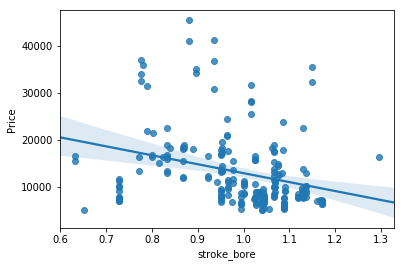

In [9]:
car_df['stroke_bore'] = car_df['stroke']/car_df['boreratio']
plotContVarAgainstPrice('stroke_bore')

## Heatmap of continuous variables

An heatmap can show the how the continuous variables are correlated

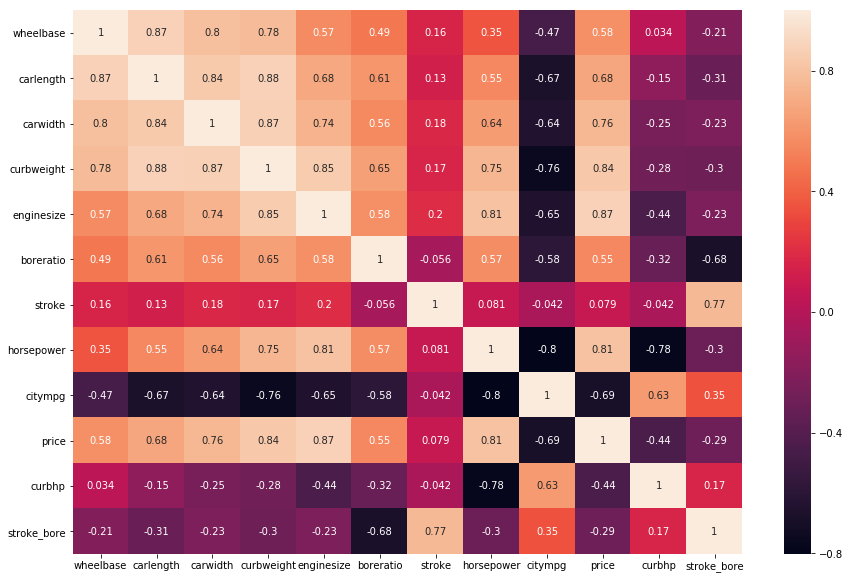

In [10]:
corr = car_df.corr()

plt.figure(figsize=(15, 10))

sns.heatmap(corr, 
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values,
            annot = True);
plt.show()

## Analysis of Categorical Variables

Lets look at how the categorical variables impact the price of the cars in US.

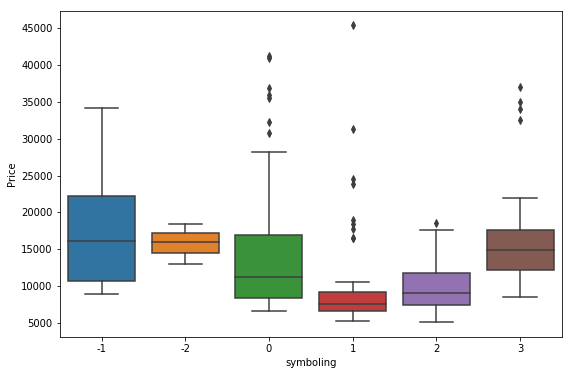

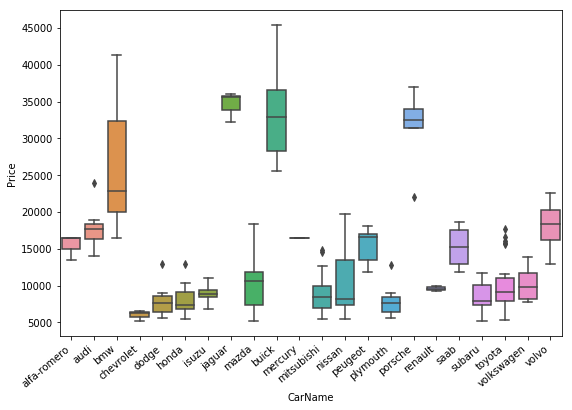

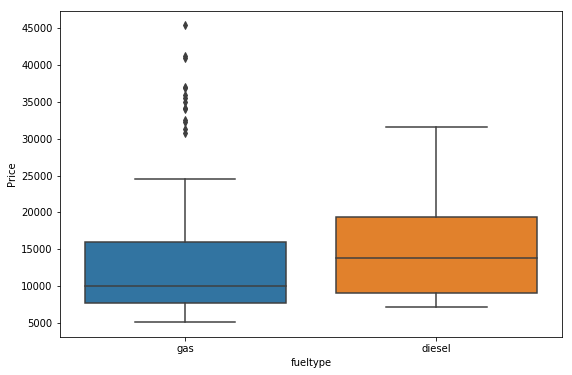

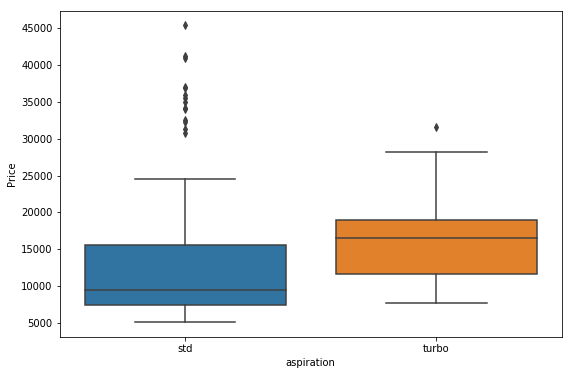

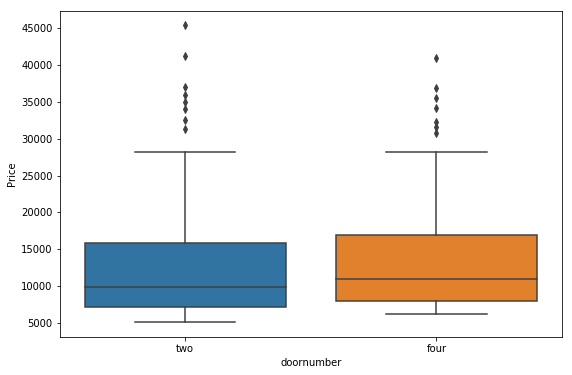

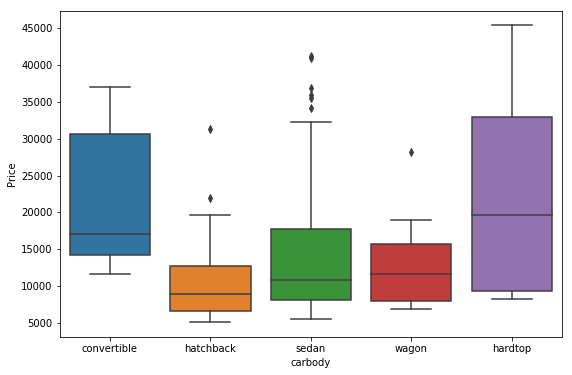

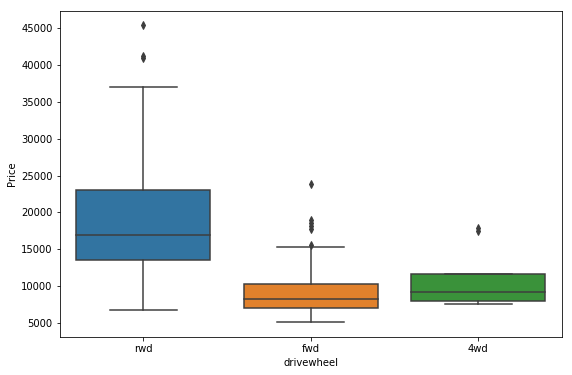

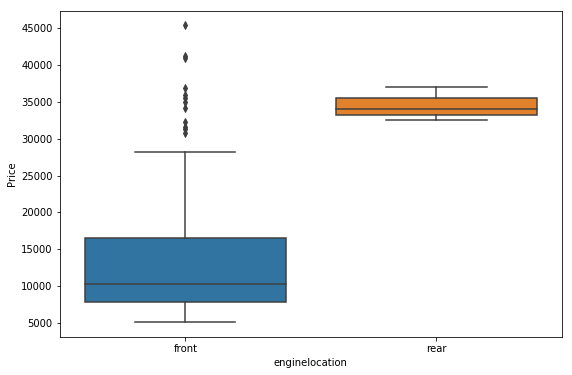

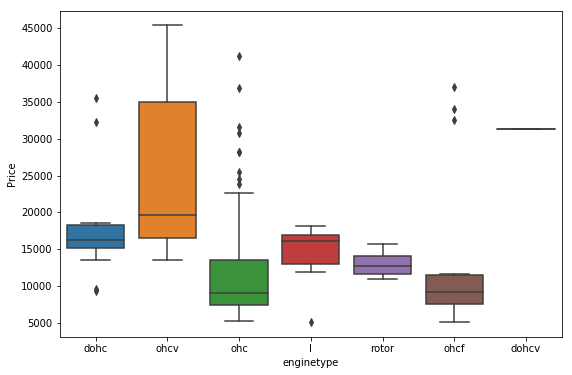

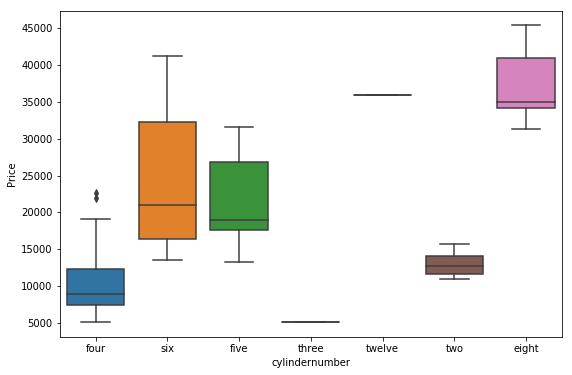

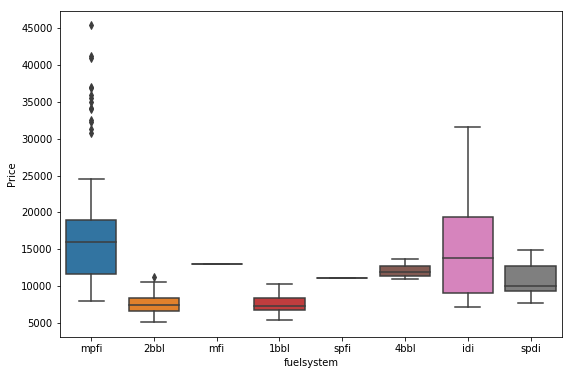

In [11]:
def plotCatVarAgainstPrice(var):
    plt.figure(figsize=(9, 6))
    ax = sns.boxplot(x=var, y='price',data=car_df)
    ax.set(xlabel = var, ylabel = 'Price')
    if var == 'CarName':
        ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    plt.show()

categorical_vars = ['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']

for var in categorical_vars:
    plotCatVarAgainstPrice(var)

Looking at the boxplots above, we can eliminate the categorical variable doornumber. This is because there is hardly any difference to the price of cars due to the different categories of doornumber.

Finally, lets also remove car_ID as it has no role in the linear regression.

In [12]:
car_df = car_df.drop(['doornumber', 'car_ID'],axis=1)
print(car_df.columns)

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'horsepower', 'citympg', 'price',
       'curbhp', 'stroke_bore'],
      dtype='object')


## Dummy Variables

We will now create dummy variables for the categorical fields of the dataframe. However, for the variables aspiration, fueltype, and enginelocation, we don't need additional dummy variables. These have only 2 categories and hence we will just replace them with 1/0.

In [13]:
car_df['aspiration'] = car_df['aspiration'].map({'std':1,'turbo':0})
car_df['fueltype'] = car_df['fueltype'].map({'gas':1,'diesel':0})
car_df['enginelocation'] = car_df['enginelocation'].map({'front':1,'rear':0})

# method to create dummy variables
def createDummies(var):
    global car_df
    dummys = pd.get_dummies(car_df[var], drop_first=True)
    car_df = pd.concat([car_df, dummys], axis=1)
    car_df = car_df.drop([var],axis=1)

createDummies('symboling')
createDummies('CarName')
createDummies('carbody')
createDummies('drivewheel')
createDummies('enginetype')
createDummies('cylindernumber')
createDummies('fuelsystem')
car_df.head(10)

,fueltype,aspiration,enginelocation,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,stroke,...,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,1,1,1,88.6,168.8,64.1,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
1,1,1,1,88.6,168.8,64.1,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
2,1,1,1,94.5,171.2,65.5,2823,152,2.68,3.47,...,0,0,0,0,0,0,0,1,0,0
3,1,1,1,99.8,176.6,66.2,2337,109,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
4,1,1,1,99.4,176.6,66.4,2824,136,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
5,1,1,1,99.8,177.3,66.3,2507,136,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
6,1,1,1,105.8,192.7,71.4,2844,136,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
7,1,1,1,105.8,192.7,71.4,2954,136,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
8,1,0,1,105.8,192.7,71.4,3086,131,3.13,3.40,...,0,0,0,0,0,0,0,1,0,0
9,1,0,1,99.5,178.2,67.9,3053,131,3.13,3.40,...,0,0,0,0,0,0,0,1,0,0


# Normalization

We will now normalize the columns.

In [14]:
# method to normalize columns
def normalize(x):
    return (x - np.mean(x))/(max(x) - min(x))

car_df = car_df.apply(normalize)
car_df.head(5)

,fueltype,aspiration,enginelocation,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,stroke,...,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,0.097561,0.180488,0.014634,-0.296110,-0.078347,-0.150650,-0.002935,0.011671,0.100174,-0.274007,...,-0.004878,-0.004878,-0.019512,-0.321951,-0.014634,-0.097561,-0.004878,0.541463,-0.043902,-0.004878
1,0.097561,0.180488,0.014634,-0.296110,-0.078347,-0.150650,-0.002935,0.011671,0.100174,-0.274007,...,-0.004878,-0.004878,-0.019512,-0.321951,-0.014634,-0.097561,-0.004878,0.541463,-0.043902,-0.004878
2,0.097561,0.180488,0.014634,-0.124099,-0.042526,-0.033984,0.103737,0.094689,-0.464111,0.102184,...,-0.004878,-0.004878,-0.019512,-0.321951,-0.014634,-0.097561,-0.004878,0.541463,-0.043902,-0.004878
3,0.097561,0.180488,0.014634,0.030420,0.038071,0.024350,-0.084781,-0.067575,-0.099826,0.068850,...,-0.004878,-0.004878,-0.019512,-0.321951,-0.014634,-0.097561,-0.004878,0.541463,-0.043902,-0.004878
4,0.097561,0.180488,0.014634,0.018758,0.038071,0.041016,0.104125,0.034312,-0.099826,0.068850,...,-0.004878,-0.004878,-0.019512,-0.321951,-0.014634,-0.097561,-0.004878,0.541463,-0.043902,-0.004878


# Model Building
The first step would be to divide the data into training and testing sets. Iteratively, we will remove variables from the list of predictors. Our target would be to get a model with minimum number of predictors and good prediction accuracy.

In [15]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# predictors
x = car_df.drop(['price'],axis=1)
# dependent variable
y = car_df['price']

# split the data into training and testing sets (70%-30%)
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=100)

import statsmodels.api as sm

# A method to create a linear regression model using the training set
def createLRModel(x_train_sm, y_train_sm):
    x_train_sm = sm.add_constant(x_train_sm)
    lm = sm.OLS(y_train_sm, x_train_sm).fit()
    return lm

### Model 1
Lets create the basic model and see its parameters.

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# A method to calculate VIF of all the variables in the training set
def calculate_vif():
    global x_train
    vif = [round(variance_inflation_factor(x_train.values, i), 2) for i in range(x_train.shape[1])]
    print("Variable\t : \tVIF")
    print("============================")
    for i in range(len(vif)):
        col = x_train.columns[i]
        print(col + "\t : \t" + str(vif[i]))

# A handy method that create a model, displays model parameters, and also the VIF of the training set.        
def createModelAndCalculateVif():
    global x_train
    global y_train
    lm = createLRModel(x_train, y_train)
    print(lm.summary())
    print('\n')
    print('VIF is given below')
    print('------------------')
    calculate_vif()
    return lm

lm = createModelAndCalculateVif()

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     47.64
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           6.70e-46
Time:                        23:13:52   Log-Likelihood:                 284.15
No. Observations:                 143   AIC:                            -450.3
Df Residuals:                      84   BIC:                            -275.5
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
fueltype          -0.0059      0.028     -0.

### Model 2
The choice of variable to eliminate are those that have high VIF and high p-value.

In [17]:
x_train = x_train.drop(['stroke_bore'],1)
lm = createModelAndCalculateVif()

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     49.02
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           9.72e-47
Time:                        23:13:52   Log-Likelihood:                 284.11
No. Observations:                 143   AIC:                            -452.2
Df Residuals:                      85   BIC:                            -280.4
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
fueltype          -0.0065      0.028     -0.

### Model 3

In [18]:
x_train = x_train.drop(['2bbl'],1)
lm = createModelAndCalculateVif()

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     50.45
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           1.40e-47
Time:                        23:13:53   Log-Likelihood:                 284.06
No. Observations:                 143   AIC:                            -454.1
Df Residuals:                      86   BIC:                            -285.2
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
fueltype          -0.0014      0.019     -0.

### Model 4

In [19]:
x_train = x_train.drop(['fueltype'],1)
lm = createModelAndCalculateVif()

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     50.45
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           1.40e-47
Time:                        23:13:53   Log-Likelihood:                 284.06
No. Observations:                 143   AIC:                            -454.1
Df Residuals:                      86   BIC:                            -285.2
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
aspiration        -0.0246      0.025     -0.

### Model 5

In [20]:
x_train = x_train.drop(['honda'],1)
lm = createModelAndCalculateVif()

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     51.96
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           1.93e-48
Time:                        23:13:53   Log-Likelihood:                 284.06
No. Observations:                 143   AIC:                            -456.1
Df Residuals:                      87   BIC:                            -290.2
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
aspiration        -0.0247      0.024     -1.

### Model 6

In [21]:
x_train = x_train.drop(['citympg'],1)
lm = createModelAndCalculateVif()

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     53.49
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           2.71e-49
Time:                        23:13:53   Log-Likelihood:                 284.00
No. Observations:                 143   AIC:                            -458.0
Df Residuals:                      88   BIC:                            -295.0
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
aspiration        -0.0248      0.024     -1.

### Model 7

In [22]:
x_train = x_train.drop(['six'],1)
lm = createModelAndCalculateVif()

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     54.76
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           4.75e-50
Time:                        23:13:53   Log-Likelihood:                 283.55
No. Observations:                 143   AIC:                            -459.1
Df Residuals:                      89   BIC:                            -299.1
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
aspiration        -0.0234      0.024     -0.

### Model 8

In [23]:
x_train = x_train.drop(['curbweight'],1)
lm = createModelAndCalculateVif()

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     56.39
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           6.52e-51
Time:                        23:13:54   Log-Likelihood:                 283.49
No. Observations:                 143   AIC:                            -461.0
Df Residuals:                      90   BIC:                            -303.9
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
aspiration        -0.0212      0.023     -0.

### Model 9

In [24]:
x_train = x_train.drop(['0'],1)
lm = createModelAndCalculateVif()

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     58.12
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           8.59e-52
Time:                        23:13:54   Log-Likelihood:                 283.47
No. Observations:                 143   AIC:                            -462.9
Df Residuals:                      91   BIC:                            -308.9
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
aspiration        -0.0209      0.022     -0.

### Model 10

In [25]:
x_train = x_train.drop(['fwd'],1)
lm = createModelAndCalculateVif()

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     59.93
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           1.10e-52
Time:                        23:13:54   Log-Likelihood:                 283.47
No. Observations:                 143   AIC:                            -464.9
Df Residuals:                      92   BIC:                            -313.8
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
aspiration        -0.0210      0.022     -0.

### Model 11

In [26]:
x_train = x_train.drop(['ohc'],1)
lm = createModelAndCalculateVif()

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     61.81
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           1.40e-53
Time:                        23:13:54   Log-Likelihood:                 283.45
No. Observations:                 143   AIC:                            -466.9
Df Residuals:                      93   BIC:                            -318.8
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
aspiration        -0.0215      0.022     -0.

### Model 12

In [27]:
x_train = x_train.drop(['subaru'],1)
lm = createModelAndCalculateVif()

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     61.81
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           1.40e-53
Time:                        23:13:54   Log-Likelihood:                 283.45
No. Observations:                 143   AIC:                            -466.9
Df Residuals:                      93   BIC:                            -318.8
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
aspiration        -0.0215      0.022     -0.

### Model 13

In [28]:
x_train = x_train.drop(['ohcf'],1)
lm = createModelAndCalculateVif()

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     62.62
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           3.94e-54
Time:                        23:13:55   Log-Likelihood:                 282.19
No. Observations:                 143   AIC:                            -466.4
Df Residuals:                      94   BIC:                            -321.2
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
aspiration        -0.0231      0.022     -1.

### Model 14
At this point most VIFs are less than 7. The few variables with high VIFs have less p-value. So, now, we are going to start eliminating variables with high p values.

In [29]:
x_train = x_train.drop(['4bbl'],1)
lm = createModelAndCalculateVif()

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     64.63
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           4.88e-55
Time:                        23:13:55   Log-Likelihood:                 282.19
No. Observations:                 143   AIC:                            -468.4
Df Residuals:                      95   BIC:                            -326.2
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
aspiration        -0.0228      0.021     -1.

### Model 15

In [30]:
x_train = x_train.drop(['spdi'],1)
lm = createModelAndCalculateVif()

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     66.73
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           5.93e-56
Time:                        23:13:55   Log-Likelihood:                 282.19
No. Observations:                 143   AIC:                            -470.4
Df Residuals:                      96   BIC:                            -331.1
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
aspiration        -0.0231      0.020     -1.

### Model 16

In [31]:
x_train = x_train.drop(['1'],1)
lm = createModelAndCalculateVif()

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     68.91
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           7.14e-57
Time:                        23:13:55   Log-Likelihood:                 282.17
No. Observations:                 143   AIC:                            -472.3
Df Residuals:                      97   BIC:                            -336.1
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
aspiration        -0.0232      0.020     -1.

### Model 17

In [32]:
x_train = x_train.drop(['chevrolet'],1)
lm = createModelAndCalculateVif()

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     71.19
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           8.49e-58
Time:                        23:13:55   Log-Likelihood:                 282.16
No. Observations:                 143   AIC:                            -474.3
Df Residuals:                      98   BIC:                            -341.0
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
aspiration        -0.0232      0.020     -1.

### Model 18

In [33]:
x_train = x_train.drop(['mazda'],1)
lm = createModelAndCalculateVif()

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     73.56
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           9.98e-59
Time:                        23:13:55   Log-Likelihood:                 282.13
No. Observations:                 143   AIC:                            -476.3
Df Residuals:                      99   BIC:                            -345.9
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
aspiration        -0.0231      0.019     -1.

### Model 19

In [34]:
x_train = x_train.drop(['idi'],1)
lm = createModelAndCalculateVif()

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     75.87
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           1.29e-59
Time:                        23:13:56   Log-Likelihood:                 281.95
No. Observations:                 143   AIC:                            -477.9
Df Residuals:                     100   BIC:                            -350.5
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
aspiration        -0.0284      0.016     -1.

### Model 20

In [35]:
x_train = x_train.drop(['renault'],1)
lm = createModelAndCalculateVif()

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     78.34
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           1.58e-60
Time:                        23:13:56   Log-Likelihood:                 281.81
No. Observations:                 143   AIC:                            -479.6
Df Residuals:                     101   BIC:                            -355.2
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
aspiration        -0.0287      0.016     -1.

### Model 21

In [36]:
x_train = x_train.drop(['mpfi'],1)
lm = createModelAndCalculateVif()

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     80.94
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           1.91e-61
Time:                        23:13:56   Log-Likelihood:                 281.68
No. Observations:                 143   AIC:                            -481.4
Df Residuals:                     102   BIC:                            -359.9
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
aspiration        -0.0300      0.016     -1.

### Model 22

In [37]:
x_train = x_train.drop(['2'],1)
lm = createModelAndCalculateVif()

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     83.49
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           2.54e-62
Time:                        23:13:56   Log-Likelihood:                 281.39
No. Observations:                 143   AIC:                            -482.8
Df Residuals:                     103   BIC:                            -364.3
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
aspiration        -0.0321      0.015     -2.

### Model 23

In [38]:
x_train = x_train.drop(['plymouth'],1)
lm = createModelAndCalculateVif()

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     86.16
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           3.31e-63
Time:                        23:13:56   Log-Likelihood:                 281.11
No. Observations:                 143   AIC:                            -484.2
Df Residuals:                     104   BIC:                            -368.7
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
aspiration        -0.0309      0.015     -2.

### Model 24

In [39]:
x_train = x_train.drop(['dodge'],1)
lm = createModelAndCalculateVif()

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     88.86
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           4.57e-64
Time:                        23:13:56   Log-Likelihood:                 280.73
No. Observations:                 143   AIC:                            -485.5
Df Residuals:                     105   BIC:                            -372.9
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
aspiration        -0.0293      0.015     -1.

### Model 25

In [40]:
x_train = x_train.drop(['jaguar'],1)
lm = createModelAndCalculateVif()

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     91.56
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           6.70e-65
Time:                        23:13:56   Log-Likelihood:                 280.25
No. Observations:                 143   AIC:                            -486.5
Df Residuals:                     106   BIC:                            -376.9
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
aspiration        -0.0302      0.015     -2.

### Model 26

In [41]:
x_train = x_train.drop(['volkswagen'],1)
lm = createModelAndCalculateVif()

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     94.17
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           1.10e-65
Time:                        23:13:56   Log-Likelihood:                 279.60
No. Observations:                 143   AIC:                            -487.2
Df Residuals:                     107   BIC:                            -380.5
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
aspiration        -0.0303      0.015     -2.

### Model 27

In [42]:
x_train = x_train.drop(['audi'],1)
lm = createModelAndCalculateVif()

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     96.53
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           2.22e-66
Time:                        23:13:57   Log-Likelihood:                 278.66
No. Observations:                 143   AIC:                            -487.3
Df Residuals:                     108   BIC:                            -383.6
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
aspiration        -0.0304      0.015     -2.

### Model 28

In [43]:
x_train = x_train.drop(['buick'],1)
lm = createModelAndCalculateVif()

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     99.90
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           2.82e-67
Time:                        23:13:57   Log-Likelihood:                 278.33
No. Observations:                 143   AIC:                            -488.7
Df Residuals:                     109   BIC:                            -387.9
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
aspiration        -0.0350      0.013     -2.

### Model 29

In [44]:
x_train = x_train.drop(['3'],1)
lm = createModelAndCalculateVif()

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     102.3
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           6.35e-68
Time:                        23:13:57   Log-Likelihood:                 277.23
No. Observations:                 143   AIC:                            -488.5
Df Residuals:                     110   BIC:                            -390.7
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
aspiration        -0.0340      0.013     -2.

### Model 30

In [45]:
x_train = x_train.drop(['isuzu'],1)
lm = createModelAndCalculateVif()

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     104.4
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           1.79e-68
Time:                        23:13:57   Log-Likelihood:                 275.82
No. Observations:                 143   AIC:                            -487.6
Df Residuals:                     111   BIC:                            -392.8
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
aspiration        -0.0332      0.014     -2.

### Model 31

In [46]:
x_train = x_train.drop(['nissan'],1)
lm = createModelAndCalculateVif()

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     107.0
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           4.33e-69
Time:                        23:13:57   Log-Likelihood:                 274.62
No. Observations:                 143   AIC:                            -487.2
Df Residuals:                     112   BIC:                            -395.4
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
aspiration        -0.0339      0.014     -2.

### Model 32

In [47]:
x_train = x_train.drop(['hardtop'],1)
lm = createModelAndCalculateVif()

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     109.9
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           9.76e-70
Time:                        23:13:57   Log-Likelihood:                 273.50
No. Observations:                 143   AIC:                            -487.0
Df Residuals:                     113   BIC:                            -398.1
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
aspiration        -0.0341      0.014     -2.

### Model 33

In [48]:
x_train = x_train.drop(['wagon'],1)
lm = createModelAndCalculateVif()

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     113.7
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           1.56e-70
Time:                        23:13:57   Log-Likelihood:                 272.80
No. Observations:                 143   AIC:                            -487.6
Df Residuals:                     114   BIC:                            -401.7
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
aspiration        -0.0336      0.014     -2.

### Model 34

In [49]:
x_train = x_train.drop(['sedan'],1)
lm = createModelAndCalculateVif()

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     118.8
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           1.51e-71
Time:                        23:13:57   Log-Likelihood:                 272.72
No. Observations:                 143   AIC:                            -489.4
Df Residuals:                     115   BIC:                            -406.5
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
aspiration        -0.0332      0.014     -2.

### Model 35

In [50]:
x_train = x_train.drop(['wheelbase'],1)
lm = createModelAndCalculateVif()

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     121.9
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           4.18e-72
Time:                        23:13:57   Log-Likelihood:                 271.31
No. Observations:                 143   AIC:                            -488.6
Df Residuals:                     116   BIC:                            -408.6
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
aspiration        -0.0357      0.013     -2.

### Model 36

In [51]:
x_train = x_train.drop(['carlength'],1)
lm = createModelAndCalculateVif()

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     125.1
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           1.26e-72
Time:                        23:13:58   Log-Likelihood:                 269.78
No. Observations:                 143   AIC:                            -487.6
Df Residuals:                     117   BIC:                            -410.5
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
aspiration        -0.0417      0.013     -3.

### Model 37

In [52]:
x_train = x_train.drop(['dohcv'],1)
lm = createModelAndCalculateVif()

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     129.9
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           2.02e-73
Time:                        23:13:58   Log-Likelihood:                 269.02
No. Observations:                 143   AIC:                            -488.0
Df Residuals:                     118   BIC:                            -414.0
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
aspiration        -0.0452      0.013     -3.

### Model 38

In [53]:
x_train = x_train.drop(['hatchback'],1)
lm = createModelAndCalculateVif()

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     133.9
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           5.58e-74
Time:                        23:13:58   Log-Likelihood:                 267.59
No. Observations:                 143   AIC:                            -487.2
Df Residuals:                     119   BIC:                            -416.1
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
aspiration        -0.0435      0.013     -3.

### Model 39

In [54]:
x_train = x_train.drop(['mercury'],1)
lm = createModelAndCalculateVif()

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     133.9
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           5.58e-74
Time:                        23:13:58   Log-Likelihood:                 267.59
No. Observations:                 143   AIC:                            -487.2
Df Residuals:                     119   BIC:                            -416.1
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
aspiration        -0.0435      0.013     -3.

### Model 40

In [55]:
x_train = x_train.drop(['mfi'],1)
lm = createModelAndCalculateVif()

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     133.9
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           5.58e-74
Time:                        23:13:58   Log-Likelihood:                 267.59
No. Observations:                 143   AIC:                            -487.2
Df Residuals:                     119   BIC:                            -416.1
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
aspiration        -0.0435      0.013     -3.

### Model 41

In [56]:
x_train = x_train.drop(['spfi'],1)
lm = createModelAndCalculateVif()

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     133.9
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           5.58e-74
Time:                        23:13:58   Log-Likelihood:                 267.59
No. Observations:                 143   AIC:                            -487.2
Df Residuals:                     119   BIC:                            -416.1
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0070      0.004      1.

### Model 42

In [57]:
x_train = x_train.drop(['rwd'],1)
lm = createModelAndCalculateVif()

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     135.8
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           4.25e-74
Time:                        23:13:58   Log-Likelihood:                 264.93
No. Observations:                 143   AIC:                            -483.9
Df Residuals:                     120   BIC:                            -415.7
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0069      0.004      1.

### Model 43

In [58]:
x_train = x_train.drop(['toyota'],1)
lm = createModelAndCalculateVif()

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     137.8
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           3.65e-74
Time:                        23:13:58   Log-Likelihood:                 262.14
No. Observations:                 143   AIC:                            -480.3
Df Residuals:                     121   BIC:                            -415.1
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0073      0.004      1.

### Model 44

In [59]:
x_train = x_train.drop(['saab'],1)
lm = createModelAndCalculateVif()

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     138.6
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           5.73e-74
Time:                        23:13:58   Log-Likelihood:                 258.65
No. Observations:                 143   AIC:                            -475.3
Df Residuals:                     122   BIC:                            -413.1
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0073      0.004      1.

### Model 45

In [60]:
x_train = x_train.drop(['ohcv'],1)
lm = createModelAndCalculateVif()

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     139.5
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           1.04e-73
Time:                        23:13:58   Log-Likelihood:                 255.02
No. Observations:                 143   AIC:                            -470.0
Df Residuals:                     123   BIC:                            -410.8
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0077      0.004      2.

### Model 46

In [61]:
x_train = x_train.drop(['-2'],1)
lm = createModelAndCalculateVif()

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     140.0
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           2.61e-73
Time:                        23:13:58   Log-Likelihood:                 251.03
No. Observations:                 143   AIC:                            -464.1
Df Residuals:                     124   BIC:                            -407.8
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0067      0.004      1.

### Model 47
We still have some variables with high VIF. Lets see if we can remove some of them without losing much on R-squarred.

In [62]:
x_train = x_train.drop(['l'],1)
lm = createModelAndCalculateVif()

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     140.0
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           2.61e-73
Time:                        23:13:58   Log-Likelihood:                 251.03
No. Observations:                 143   AIC:                            -464.1
Df Residuals:                     124   BIC:                            -407.8
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0067      0.004      1.

### Model 48

In [63]:
x_train = x_train.drop(['rotor'],1)
lm = createModelAndCalculateVif()

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     140.0
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           2.61e-73
Time:                        23:13:59   Log-Likelihood:                 251.03
No. Observations:                 143   AIC:                            -464.1
Df Residuals:                     124   BIC:                            -407.8
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0067      0.004      1.

Although, we still have a few more variables with high VIF, it is hard to eliminate them. For example, eliminating enginesize or four (cylindernumber) causes significant decrese in R-squarred. Removing horsepower is probably not a good idea because horsepower is an important factor for customers buying cars in US.

### Model 49
Now, we will try to use our business judgement to remove some more features. We understand that brand name (such as Peugeot) impacts car price, but since this parameters cannot be practically used by Geely to set its car price, we will try to eliminate a few of them. While eliminating such parameters, we are hopeful that the information (or car price) explained by the brand name parameters can be explained by other existing parameters.

In [64]:
x_train = x_train.drop(['peugeot'],1)
lm = createModelAndCalculateVif()

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     138.2
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           2.19e-72
Time:                        23:13:59   Log-Likelihood:                 245.68
No. Observations:                 143   AIC:                            -455.4
Df Residuals:                     125   BIC:                            -402.0
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0060      0.004      1.

### Model 50
curbhp has high p-value. Lets see if we can remove it.

In [65]:
x_train = x_train.drop(['curbhp'],1)
lm = createModelAndCalculateVif()

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     143.7
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           1.01e-72
Time:                        23:13:59   Log-Likelihood:                 243.69
No. Observations:                 143   AIC:                            -453.4
Df Residuals:                     126   BIC:                            -403.0
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0059      0.004      1.

### Model 51

In [66]:
x_train = x_train.drop(['mitsubishi'],1)
lm = createModelAndCalculateVif()

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     136.6
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           1.24e-70
Time:                        23:13:59   Log-Likelihood:                 235.37
No. Observations:                 143   AIC:                            -438.7
Df Residuals:                     127   BIC:                            -391.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0054      0.004      1.

### Model 52
Although horsepower is an important factor, in this context we are seeing high p-value and Vif. Also, in the correlation heat map horse power had significant correlation with other variables. Thus we can drop horsepower and still expect a good R-squarred.

In [67]:
x_train = x_train.drop(['horsepower'],1)
lm = createModelAndCalculateVif()

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     145.4
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           2.35e-71
Time:                        23:13:59   Log-Likelihood:                 234.41
No. Observations:                 143   AIC:                            -438.8
Df Residuals:                     128   BIC:                            -394.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0048      0.004      1.

### Model 53
High Vif for cylindernumber four.

In [68]:
x_train = x_train.drop(['four'],1)
lm = createModelAndCalculateVif()

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     118.6
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           4.76e-65
Time:                        23:13:59   Log-Likelihood:                 215.36
No. Observations:                 143   AIC:                            -402.7
Df Residuals:                     129   BIC:                            -361.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0002      0.005      0.

### Model 54

In [69]:
x_train = x_train.drop(['volvo'],1)
lm = createModelAndCalculateVif()

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     124.7
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           3.77e-65
Time:                        23:13:59   Log-Likelihood:                 212.90
No. Observations:                 143   AIC:                            -399.8
Df Residuals:                     130   BIC:                            -361.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -8.265e-05      0.005     -0.

### Model 55

In [70]:
x_train = x_train.drop(['five'],1)
lm = createModelAndCalculateVif()

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     133.4
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           1.62e-65
Time:                        23:13:59   Log-Likelihood:                 211.10
No. Observations:                 143   AIC:                            -398.2
Df Residuals:                     131   BIC:                            -362.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0003      0.005      0.

### Model 56

In [71]:
x_train = x_train.drop(['porsche'],1)
lm = createModelAndCalculateVif()

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     139.9
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           3.57e-65
Time:                        23:13:59   Log-Likelihood:                 207.49
No. Observations:                 143   AIC:                            -393.0
Df Residuals:                     132   BIC:                            -360.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0012      0.005      0.

### Model 57

In [72]:
x_train = x_train.drop(['three'],1)
lm = createModelAndCalculateVif()

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     147.6
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           1.01e-64
Time:                        23:13:59   Log-Likelihood:                 203.60
No. Observations:                 143   AIC:                            -387.2
Df Residuals:                     133   BIC:                            -357.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0014      0.005      0.

# Model Finalization

At this point, we are going to stop tuning our linear regression model any further. Following are our reasons to finalize this model:
- Low p-values of all variables. This means that all the variables chosen are statistically significant
- Low VIF of all variables. There is not much correlation between the independent variables.
- Good R-squarred of the final model. The value stands at 0.909
- Good adjusted R-squarred of the final model. The value stands at 0.903 which is very close to R-squarred. In other words, for this model, none of the variables are redundant.
- The variables in consideration are ones that Geely automobile can easily influence while deciding their car's prices.

# Evaluation
We will now test the model using the test dataframe which we had obtained before creating the first model.

In [73]:
# predictors for testing
x_test = x_test[['aspiration', 'enginelocation', 'carwidth', 'enginesize', 'boreratio', 'stroke', 'bmw', 'twelve', 'two']]
x_test = sm.add_constant(x_test, has_constant='add')
# predicted output for the dependent variable
y_pred = lm.predict(x_test)

# Plots
- Lets plot the actual and the predicted values of car price from the test data. A good overlap would indicate a good model.

Text(0,0.5,'Price')

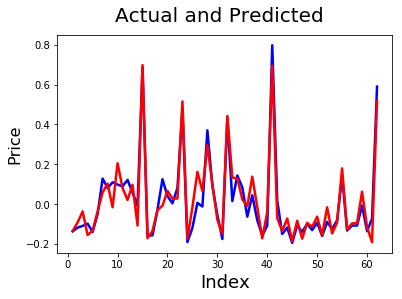

In [74]:
c = [i for i in range(1,63,1)] # generating index 
fig = plt.figure() 
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-") #Plotting Actual
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-") #Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Price', fontsize=16)                       # Y-label

- Lets plot the error in prediction accuracy, given by the formula: error = ytest - ypred.
Here ytest is the actual value of the car price in the test dataset. Ypred is the predicted value using our generated model. 

Text(0,0.5,'ytest-ypred')

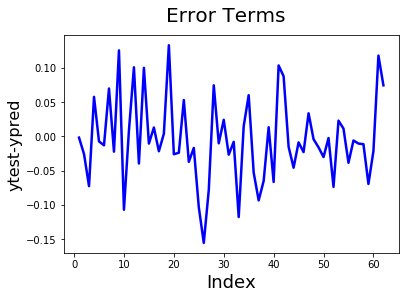

In [75]:
# Error terms
c = [i for i in range(1,63,1)]
fig = plt.figure()
plt.plot(c,y_test-y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label

- Since the plot is indicating that the errors are randomly distributed, we can dismiss this as white noise. Our model has explained all patterns in the data quite well.

- Now we will plot a bivariate scatterplot between y_test and y_pred. A positive linear relationship indicates that the model's output closely aligns with the actual output.

Text(0,0.5,'y_pred')

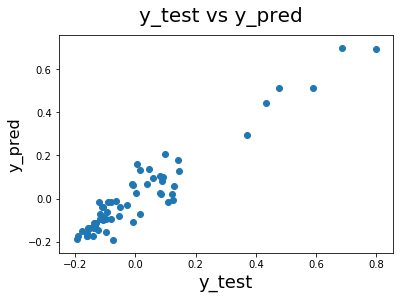

In [76]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

- Finally, we will plot the error distribution. We expect a gaussian distribution with peak at 0.

Text(0,0.5,'Index')

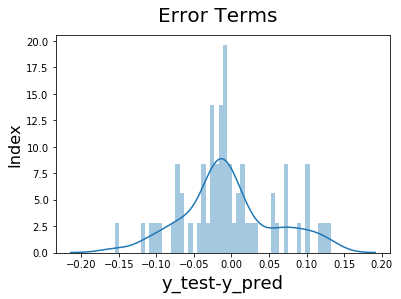

In [77]:
# Plotting the error terms to understand the distribution.
fig = plt.figure()
sns.distplot((y_test-y_pred),bins=50)
fig.suptitle('Error Terms', fontsize=20)                  # Plot heading 
plt.xlabel('y_test-y_pred', fontsize=18)                  # X-label
plt.ylabel('Index', fontsize=16)                          # Y-label

# Root Mean Square Error of Final Model

In [78]:
# Now let's check the Root Mean Square Error of our model.
import numpy as np
from sklearn import metrics
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE : 0.06099798196348509


# Conclusion

Through linear regression we were able to find out the most important variables that will determine the price of a car in US. We have also considered the business perspective of Geely, and have come up with variables that Geely can directly modify depending on the price of their cars.

Following is our list of variables that will impact the price of a car in US. The variables are arranged in the order of their impact on the price of the car in descending order with maximum impact variable placed at 1. The order is decided by analyzing the coefficients of these variables in the linear regression equation.

1. enginesize - Engine's capacity or displacement	
2. carwidth	- The width of the car	
3. enginelocation - Location of the engine in the car
4. twelve - A total number of twelve cylinders (high price)
5. bmw - Car brands like BMW
6. two - A total number of two cylinders (low price)
7. stroke - Stroke (length the piston travels from bottom to top position, inside the cylinder) of the car
8. boreratio - Bore ratio of the car
9. aspiration - aspiration used in the car